In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set_theme()
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [3]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [4]:
df.corr()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
area,1.000000,0.994449,0.609904,0.951175,0.970978,-0.222804,0.863362,-0.341249
perimeter,0.994449,1.000000,0.531880,0.972955,0.945499,-0.210643,0.890382,-0.322321
compactness,0.609904,0.531880,1.000000,0.374069,0.762191,-0.330206,0.227129,-0.541270
length_kernel,0.951175,0.972955,0.374069,1.000000,0.862704,-0.168791,0.933248,-0.248737
width_kernel,0.970978,0.945499,0.762191,0.862704,1.000000,-0.253155,0.748826,-0.422823
asymmetry_coeff,-0.222804,-0.210643,-0.330206,-0.168791,-0.253155,1.000000,-0.005443,0.571351
length_of_kernel_groove,0.863362,0.890382,0.227129,0.933248,0.748826,-0.005443,1.000000,0.033120
target,-0.341249,-0.322321,-0.541270,-0.248737,-0.422823,0.571351,0.033120,1.000000


In [5]:
drop_clms = ['perimeter','length_of_kernel_groove']
df= df.drop(columns=drop_clms)
feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

Text(0, 0.5, 'Accuracy')

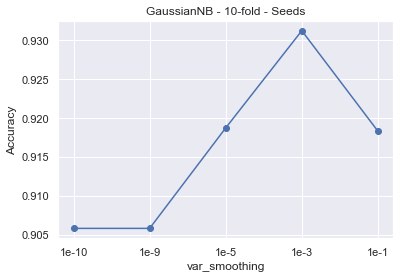

In [7]:
#GaussianNB
kf = KFold(n_splits=10)
performance_dict = {}
var_sm_list = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
for var_sm in var_sm_list:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GaussianNB(var_smoothing=var_sm)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[var_sm] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("GaussianNB - 10-fold - Seeds")
plt.plot([1,2,3,4,5], accuracies, marker='o')
plt.xticks([1,2,3,4,5],['1e-10','1e-9','1e-5','1e-3','1e-1'])
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

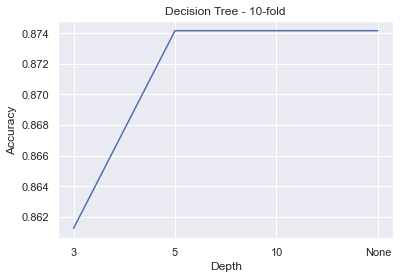

In [63]:

kf = KFold(n_splits=10)
max_depth = [3,5,10,None]
performance_dict = {}
for max_d in max_depth:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = DecisionTreeClassifier(max_depth = max_d, random_state=0, criterion='gini')
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[max_d] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("Decision Tree - 10-fold")
plt.plot([1,2,3,4], accuracies)
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
#tree.plot_tree(clf)

## Examining the hyperparameter for Decision Tree
### The accuracy peaks at about 0.93 for depth values more than or equal to 5 in the given selection of values. Taking performance into consideration along with accuracy, the best value for depth is 5 since lesser depth means lesser number of comparisons and the sooner we get our prediction.

Decision Tree Test Accuracy at depth of 5 is... 0.8


[Text(201.86470588235295, 199.32, 'compactness <= 5.76\ngini = 0.664\nsamples = 158\nvalue = [50, 59, 49]\nclass = Rosa'),
 Text(108.31764705882354, 163.07999999999998, 'area <= 12.71\ngini = 0.52\nsamples = 97\nvalue = [46, 2, 49]\nclass = Canadian'),
 Text(39.38823529411765, 126.83999999999999, 'width_kernel <= 1.851\ngini = 0.12\nsamples = 47\nvalue = [3, 0, 44]\nclass = Canadian'),
 Text(19.694117647058825, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Kama'),
 Text(59.082352941176474, 90.6, 'perimeter <= 0.882\ngini = 0.043\nsamples = 45\nvalue = [1, 0, 44]\nclass = Canadian'),
 Text(39.38823529411765, 54.359999999999985, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]\nclass = Canadian'),
 Text(78.7764705882353, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Kama'),
 Text(177.24705882352941, 126.83999999999999, 'width_kernel <= 5.269\ngini = 0.249\nsamples = 50\nvalue = [43, 2, 5]\nclass = Kama'),
 Text(137.85882352941178, 90.6, 'length_kernel

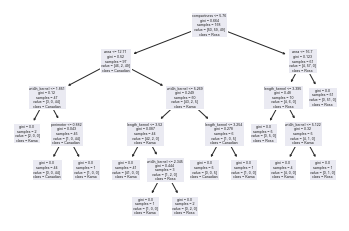

In [64]:
clf = DecisionTreeClassifier(max_depth = 5, random_state=0, criterion='gini')
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
DT_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Decision Tree Test Accuracy at depth of 5 is...", DT_Test_Acc)
tree.plot_tree(clf, feature_names=feature_nms, class_names=class_nms)

Text(30.5, 0.5, 'Depth')

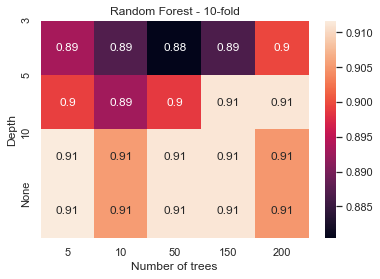

In [65]:
#Random Forest
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]
perf_n_tree = pd.DataFrame()
perf_depth = []
for n_tree in n_trees:
    perf_depth=[]
    for max_d in max_depth:
        acc = []
        for train_index,val_index in kf.split(X_train):
            clf = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
            X_Tr = X_train.iloc[train_index,:]
            Y_Tr = Y_train.iloc[train_index,:]
            X_V = X_train.iloc[val_index,:]
            Y_V = Y_train.iloc[val_index,:]
            clf = clf.fit(X_Tr, Y_Tr)
            Y_P = clf.predict(X_V)
            acc.append(metrics.accuracy_score(Y_V, Y_P))
        perf_depth.append(np.mean(acc))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
    perf_n_tree[str(n_tree)]=perf_depth
accuracies = list(performance_dict.values())
plt.title("Random Forest - 10-fold")
hm = sns.heatmap(perf_n_tree, annot=True)
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')

## Evaluating hyperparameters for Random Forest
### From the heatmap plot above, we can see that we attain best performance at a range of values the hyperparameters of Depth and Number of Trees. Among this, the best value would be Depth = 10 & Number of Trees = 50 considering the positive impact it would have on computation performance and inference speed. Higher these two parameters are, more is the performance overhead interms of storage and computation.

In [48]:
clf = RandomForestClassifier(max_depth = 5, random_state=0, n_estimators=10)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
RF_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Random Forest Test Accuracy at depth of 10 and Max 50 no of trees is...", RF_Test_Acc)

Random Forest Test Accuracy at depth of 10 and Max 50 no of trees is... 0.85


Text(0, 0.5, 'Accuracy')

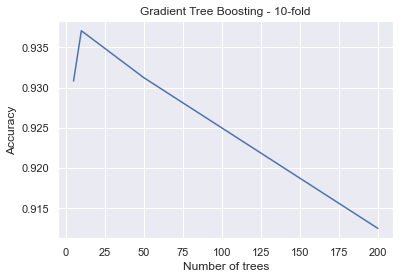

In [46]:
#Gradient Boosting Classifier
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
perf_n_tree = []
for n_tree in n_trees:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GradientBoostingClassifier(n_estimators = n_tree)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    perf_n_tree.append(np.mean(acc))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
plt.title("Gradient Tree Boosting - 10-fold")
plt.plot(n_trees, perf_n_tree)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

## Performance and hyperparameter evaluation
### Performance peaks at 150 number of trees and hence we will choose that for the number of trees hyperparameter value.

In [47]:
clf = GradientBoostingClassifier(n_estimators=150)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
print("Gradient Boosting Test Accuracy at  Max 150 no of trees is...", GB_Test_Acc)

Gradient Boosting Test Accuracy at  Max 150 no of trees is... 0.875
